In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import plot_confusion_matrix, cohen_kappa_score, plot_roc_curve, accuracy_score, roc_auc_score, precision_recall_curve, confusion_matrix, roc_curve, auc

In [3]:
# Load Data
os.chdir(r'C:\Users\alanw\OneDrive\Varsity\Research\Experiments\dissertation')
df = pd.read_csv('UCI_Credit_Card_balanced.csv')

The data set is licensed under a [CC0 1.0](https://creativecommons.org/publicdomain/zero/1.0/) licence.

In [4]:
# Scale data
scaler = StandardScaler()
scaler.fit(df.drop('Y',axis=1))
scaled_features = scaler.fit_transform(df.drop('Y',axis=1))

In [5]:
# Split the features from the response variable
X = pd.DataFrame(scaled_features,columns=df.columns[:-1])
y = df['Y']

# Train test split1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [6]:
# Define the model
cart = DecisionTreeClassifier(random_state=69, ccp_alpha=0.00025)  

# Fit the model
t0 = datetime.now()
cart.fit(X_train, y_train)
t1 = datetime.now()
print("Training Time: ", (t1 - t0))

Training Time:  0:00:00.878970


In [7]:
# Apply the model to the test data
y_pred = cart.predict(X_test)

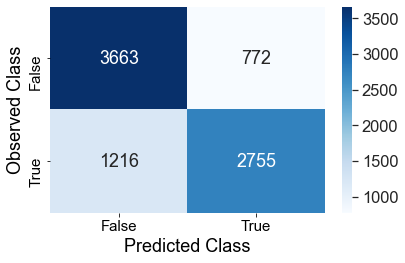

In [13]:
# Plot Confusion metric
cm = confusion_matrix(y_test, y_pred)

ax = plt.subplot()
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");  

label_font = {'size':'18'}
ax.set_xlabel('Predicted Class', fontdict=label_font);
ax.set_ylabel('Observed Class', fontdict=label_font);

ax.tick_params(axis='both', which='major', labelsize=15)
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['False', 'True']);

plt.tight_layout()
plt.savefig(r'C:\Users\alanw\OneDrive\Varsity\Research\Paper Itself\LaTeX\images\cart_conf.png')

plt.show()

<Figure size 504x360 with 0 Axes>

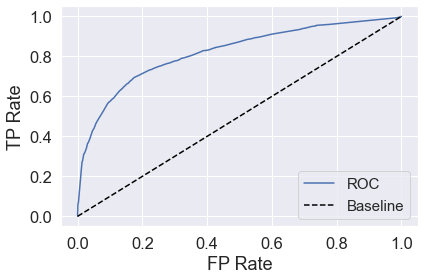

In [14]:
# Plot ROC Curve
plt.figure(figsize=(7, 5))
ax = plot_roc_curve(cart,X_test,y_test)
x = np.linspace(0, 1, 100)
ax = plt.plot(x, x, linestyle='--',color='black')

font = {'size'   : 10}
plt.rc('font', **font)

plt.xlabel("FP Rate")
plt.ylabel("TP Rate")
plt.legend(["ROC", "Baseline"], fontsize=15, loc="best")

plt.tight_layout()
plt.savefig(r'C:\Users\alanw\OneDrive\Varsity\Research\Paper Itself\LaTeX\images\cart_roc.png')

plt.show()

In [16]:
# Calculate Cohen's kappa
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa: %.2f" % (kappa))

Cohen's Kappa: 0.52


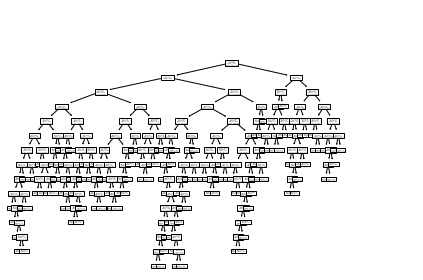

In [11]:
# Plot of full tree
plt.figure()
plot_tree(cart,feature_names=X.columns)
plt.tight_layout()
plt.savefig(r'C:\Users\alanw\OneDrive\Varsity\Research\Paper Itself\LaTeX\images\cart_tree.png')
plt.show()